# Relatório de Análises VII

## Criando Agrupamentos

In [35]:
import pandas as pd

In [36]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep=';')

In [37]:
dados.sample(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
12358,Apartamento,São Conrado,3,2,1,250,5500.0,750.0,500.0,22.00,Apartamento
17282,Casa,Maracanã,5,1,0,161,6000.0,0.0,0.0,37.27,Casa
10900,Apartamento,Lagoa,2,2,1,98,3800.0,795.0,2765.0,38.78,Apartamento
15008,Apartamento,Copacabana,2,0,0,101,5000.0,736.0,170.0,49.50,Apartamento
8267,Apartamento,Ipanema,3,1,0,126,6000.0,1667.0,590.0,47.62,Apartamento
9950,Apartamento,Barra da Tijuca,4,3,3,160,8500.0,2300.0,345.0,53.12,Apartamento
14618,Apartamento,Barra da Tijuca,3,1,1,90,3500.0,1450.0,221.0,38.89,Apartamento
17106,Casa,Campo Grande,3,1,0,80,1000.0,0.0,0.0,12.50,Casa
13810,Apartamento,Tijuca,2,0,0,62,1400.0,250.0,47.0,22.58,Apartamento
8445,Apartamento,Botafogo,2,1,1,62,2200.0,730.0,131.0,35.48,Apartamento


#### https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [38]:
dados['Valor'].mean()

3465.402299430185

In [39]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [40]:
dados['Bairro'].drop_duplicates()

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [41]:
grupo_bairro = dados.groupby('Bairro')

In [42]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [43]:
grupo_bairro.groups

{'Barra da Tijuca': [7, 13, 19, 21, 24, 31, 44, 47, 51, 56, 60, 70, 81, 84, 86, 89, 98, 100, 114, 116, 118, 124, 130, 139, 142, 161, 167, 168, 177, 180, 182, 186, 207, 209, 220, 222, 227, 233, 254, 267, 273, 275, 281, 285, 290, 292, 300, 325, 326, 327, 328, 331, 339, 349, 350, 351, 359, 365, 373, 379, 381, 411, 412, 413, 418, 421, 423, 424, 446, 449, 451, 456, 469, 483, 486, 498, 500, 507, 528, 530, 532, 534, 542, 544, 547, 550, 560, 566, 584, 591, 593, 594, 596, 600, 601, 606, 608, 614, 615, 625, ...], 'Botafogo': [14, 35, 66, 67, 85, 91, 96, 102, 147, 151, 169, 269, 313, 314, 377, 399, 401, 416, 454, 496, 523, 548, 582, 589, 637, 664, 706, 766, 797, 826, 833, 849, 853, 861, 871, 890, 915, 918, 929, 947, 974, 985, 993, 1003, 1028, 1053, 1077, 1082, 1107, 1153, 1164, 1208, 1247, 1266, 1275, 1299, 1331, 1332, 1365, 1387, 1395, 1397, 1478, 1487, 1507, 1521, 1528, 1535, 1570, 1600, 1603, 1613, 1615, 1616, 1618, 1625, 1665, 1677, 1688, 1706, 1741, 1745, 1783, 1829, 1849, 1857, 1871, 1885, 

In [44]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean()}')

Barra da Tijuca -> 5500.497783032811
Botafogo -> 3375.4605418138985
Copacabana -> 3351.519427402863
Flamengo -> 3220.119266055046
Ipanema -> 5451.549307253464
Leblon -> 5661.45393258427
Tijuca -> 1999.9380127620784


In [45]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,5500.50,3588.23
Botafogo,3375.46,939.98
Copacabana,3351.52,1039.22
Flamengo,3220.12,933.88
Ipanema,5451.55,1674.58
Leblon,5661.45,1617.80
Tijuca,1999.94,713.43


## Estatísticas Descritivas

In [46]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.0,3700.0,6700.0,32000.0
Botafogo,849.0,3375.46,2015.90,700.0,2200.0,3000.0,4250.0,22000.0
Copacabana,2445.0,3351.52,1904.58,100.0,1915.0,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.0,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.0,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.0,5000.0,7000.0,30000.0
Tijuca,1097.0,1999.94,1039.67,750.0,1500.0,1800.0,2300.0,19000.0


In [47]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum', 'mean']).round(2).rename(columns={'min': 'Mínimo',
                                                                                        'max': 'Máximo',
                                                                                        'sum': 'Soma',
                                                                                        'mean': 'Média'})

,Mínimo,Máximo,Soma,Média
Bairro,,,,
Barra da Tijuca,800.0,32000.0,18608184.0,5500.50
Botafogo,700.0,22000.0,2865766.0,3375.46
Copacabana,100.0,9900.0,8194465.0,3351.52
Flamengo,800.0,9500.0,2105958.0,3220.12
Ipanema,1200.0,9900.0,6689051.0,5451.55
Leblon,100.0,30000.0,5038694.0,5661.45
Tijuca,750.0,19000.0,2193932.0,1999.94


### Matplotlib

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,10))

#### Plotando pelo desvio padrão

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

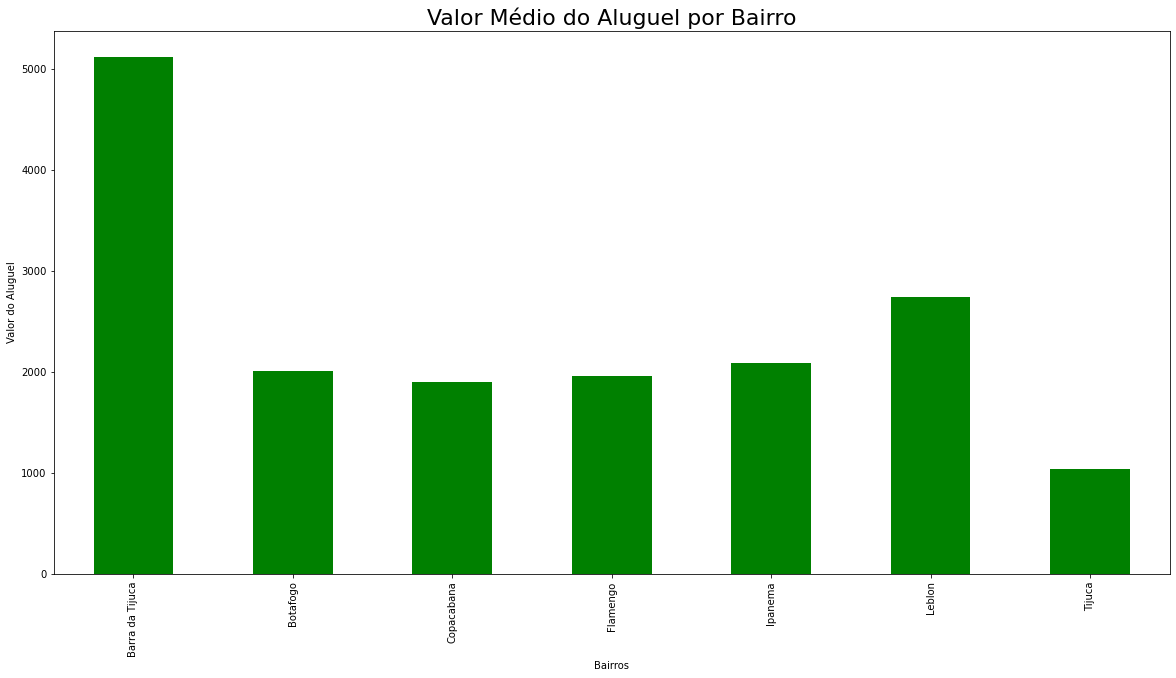

In [57]:
fig = grupo_bairro['Valor'].std().plot.bar(color='green')
fig.set_ylabel('Valor do Aluguel')
fig.set_xlabel('Bairros')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

#### Plotando pelo valor máximo

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

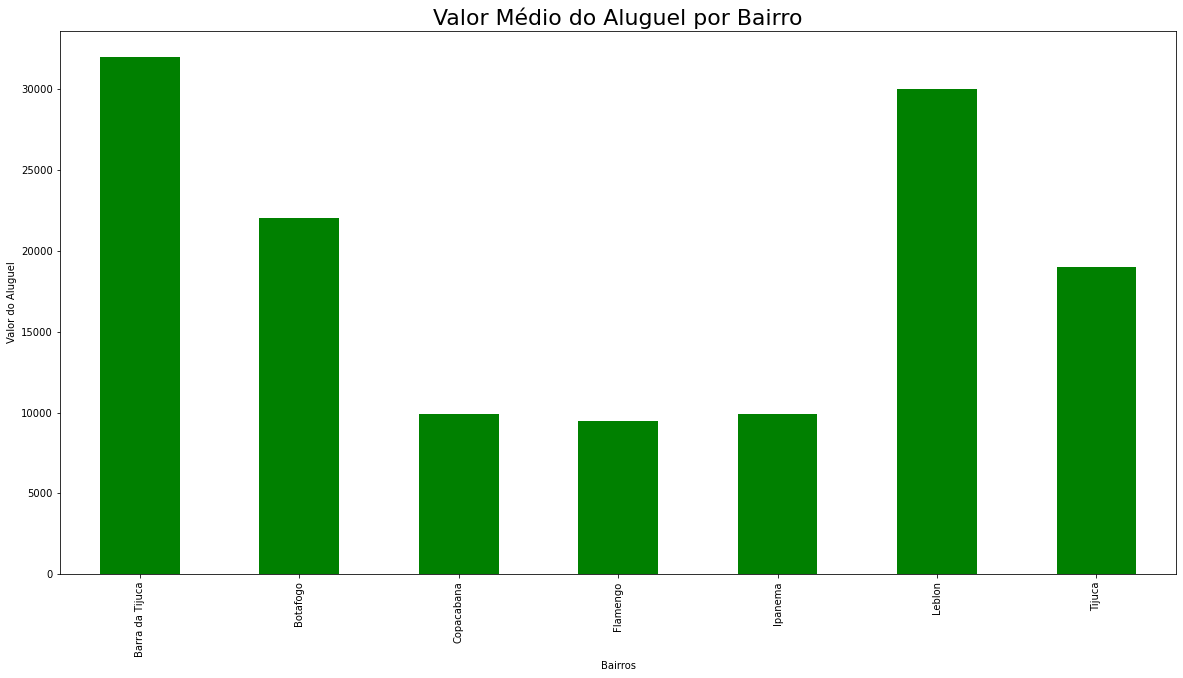

In [58]:
fig = grupo_bairro['Valor'].max().plot.bar(color='green')
fig.set_ylabel('Valor do Aluguel')
fig.set_xlabel('Bairros')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})